In [1]:
import numpy as np
import pandas as pd
import nltk
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import spacy

In [3]:
pd_ori=pd.read_csv('all.csv')

In [4]:
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner", "textcat"])
nltk_tokenizer = RegexpTokenizer(r'\w+')
def tokenizer(text):
    return nltk_tokenizer.tokenize(text)
  


In [5]:
def remove_stopwords(review):
    all_word = []
    for sentence in tqdm(review):
        all_word_list = []
        for token in sentence:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                all_word_list.append(token)
        all_word.append(" ".join(all_word_list))    
        
    return all_word

In [6]:
tokenized_review=[]
for i in range(len(pd_ori)):
    tokenized_review.append(tokenizer(pd_ori['review'][i]))
tokenized_review_new=remove_stopwords(tokenized_review)

100%|██████████| 608598/608598 [00:36<00:00, 16776.89it/s]


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tokenized_review_new

['Drinks bad hot chocolate watered latte burnt taste food poor quality service worst cashier rude',
 'worst experience ve casual coffee light fare place server disappeared 20 minutes talking friend window girlfriend sat dumbfounded dude nerve job trying eye contact clearly getting paid talk bud important girlfriend went counter server disappeared 5 minutes guy asked order food girl counter gives weird look says ll server arrive look table laugh Yeah leaving hanging half goddamn hour place customers funny retrospect collective incompetence false sense entitlement certainly food okay place called toast d figured bread better cold Le Bus Additionally m 95 sure andouille special link pre packaged offering Trader Joe s cut pieces 9 unapologetic mediocrity happening Avoid place like plague didn t leave tip honestly shouldn t felt buyer s remorse day disgrace',
 'located site old Spruce St Video mild cofee good pastris great times service slow busy times patrons receive complimentary mimosa d

In [7]:
tfidf_model = TfidfVectorizer(use_idf=True,
                              min_df=5,
                              max_df=0.4,
                              ngram_range=(1, 2),
                              sublinear_tf=True)

In [8]:
tfidf_fit=tfidf_model.fit_transform(tokenized_review_new)

In [9]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(pd_ori, pd_ori['label']):
    X_train=tfidf_fit[train_index]
    y_train=pd_ori['label'][train_index]
    X_test=tfidf_fit[test_index]
    y_test=pd_ori['label'][test_index]

In [20]:
y_test_df=pd.DataFrame({'label':y_test.tolist()})

In [21]:
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(y_test_df, y_test_df['label']):
    X_train=X_test[train_index]
    y_train=y_test_df['label'][train_index]
    X_test=X_test[test_index]
    y_test=y_test_df['label'][test_index]

In [22]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [25]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5281
           1       0.83      0.01      0.01       805

    accuracy                           0.87      6086
   macro avg       0.85      0.50      0.47      6086
weighted avg       0.86      0.87      0.81      6086



In [26]:
from sklearn.metrics import roc_auc_score

In [32]:
print(roc_auc_score(y_pred, y_test))

0.8508771929824562


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def result_evalation(predict_result, true_result):
    print("accuracy:", accuracy_score(true_result, predict_result))
    print("precision:", precision_score(true_result, predict_result))
    print("recall:", recall_score(true_result, predict_result))
    print("f1:", f1_score(true_result, predict_result))


In [28]:
result_evalation(y_pred, y_test)

accuracy: 0.8683864607295432
precision: 0.8333333333333334
recall: 0.006211180124223602
f1: 0.012330456226880393


In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt

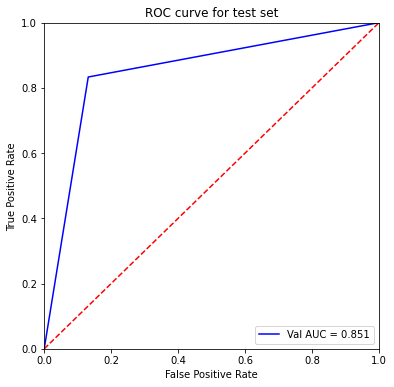

In [36]:
fpr, tpr, threshold = metrics.roc_curve(y_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC curve for test set')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
